In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import matplotlib and use the `nbagg` backend
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

In [3]:
# create pandas and numpy dependencies
import pandas as pd
import numpy as np

In [108]:
# Python SQL toolkit and ORM
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, desc
from sqlalchemy.sql import label

In [5]:
# create engine using the `hawaii.sqlite` database file
engine = create_engine('sqlite:///hawaii.sqlite', echo=False)

In [6]:
# explore the contents of the tables using inspector
inspector = inspect(engine)
inspector.get_table_names()

['measurements', 'station']

In [7]:
# print the column name and types of `measurements` table
columns = inspector.get_columns('measurements')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs INTEGER


In [8]:
# print the column name and types of `station` table
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# select and display the first five (5) rows of the `measurements` table
engine.execute('SELECT * FROM measurements LIMIT 5').fetchall()

[(0, 'USC00519397', '2010-01-01', 0.08, 65),
 (1, 'USC00519397', '2010-01-02', 0.0, 63),
 (2, 'USC00519397', '2010-01-03', 0.0, 74),
 (3, 'USC00519397', '2010-01-04', 0.0, 76),
 (5, 'USC00519397', '2010-01-07', 0.06, 70)]

In [10]:
# select and display the first five (5) rows of the `station` table
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [11]:
# reflect the database into the ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurements', 'station']

In [12]:
# assign each class to a variable
Measurements = Base.classes.measurements
Station = Base.classes.station

In [13]:
# create a session
session = Session(engine)

In [14]:
# use the session to query the Measurements table and display information
for row in session.query(Measurements, Measurements.station).limit(5).all():
    print(row)

(<sqlalchemy.ext.automap.measurements object at 0x000001F7474FFBE0>, 'USC00519397')
(<sqlalchemy.ext.automap.measurements object at 0x000001F7474FFC50>, 'USC00519397')
(<sqlalchemy.ext.automap.measurements object at 0x000001F7474FFCC0>, 'USC00519397')
(<sqlalchemy.ext.automap.measurements object at 0x000001F7474FFD30>, 'USC00519397')
(<sqlalchemy.ext.automap.measurements object at 0x000001F7474FFDA0>, 'USC00519397')


In [15]:
# use the session to query the Station table and display information
for row in session.query(Station, Station.name).limit(5).all():
    print(row)

(<sqlalchemy.ext.automap.station object at 0x000001F747545780>, 'WAIKIKI 717.2, HI US')
(<sqlalchemy.ext.automap.station object at 0x000001F7475457F0>, 'KANEOHE 838.1, HI US')
(<sqlalchemy.ext.automap.station object at 0x000001F747545860>, 'KUALOA RANCH HEADQUARTERS 886.9, HI US')
(<sqlalchemy.ext.automap.station object at 0x000001F7475458D0>, 'PEARL CITY, HI US')
(<sqlalchemy.ext.automap.station object at 0x000001F747545940>, 'UPPER WAHIAWA 874.3, HI US')


Precipitation Analysis

In [16]:
# get the latest date from the dataset
latest_date = dt.datetime.strptime('2017-08-23', '%Y-%m-%d')

In [17]:
# retrieve the last 12 months of precipitation data
last_year = latest_date - dt.timedelta(days = 365)

In [18]:
# verify vacation dates
vacation = latest_date - dt.timedelta(weeks=1)

In [19]:
# select only the `date` and `prcp` values
results = session.query(Measurements.date, Measurements.prcp).filter(Measurements.date >= last_year).all()

In [20]:
# load the results into a pandas dataframe
precip = pd.DataFrame(results, columns = ["Date", "Precipitation"])

In [21]:
 # set the index to the `date` column
precip.set_index("Date", inplace=True)

In [22]:
# show first five rows of results dataframe
precip.head()

,Precipitation
Date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


<IPython.core.display.Javascript object>


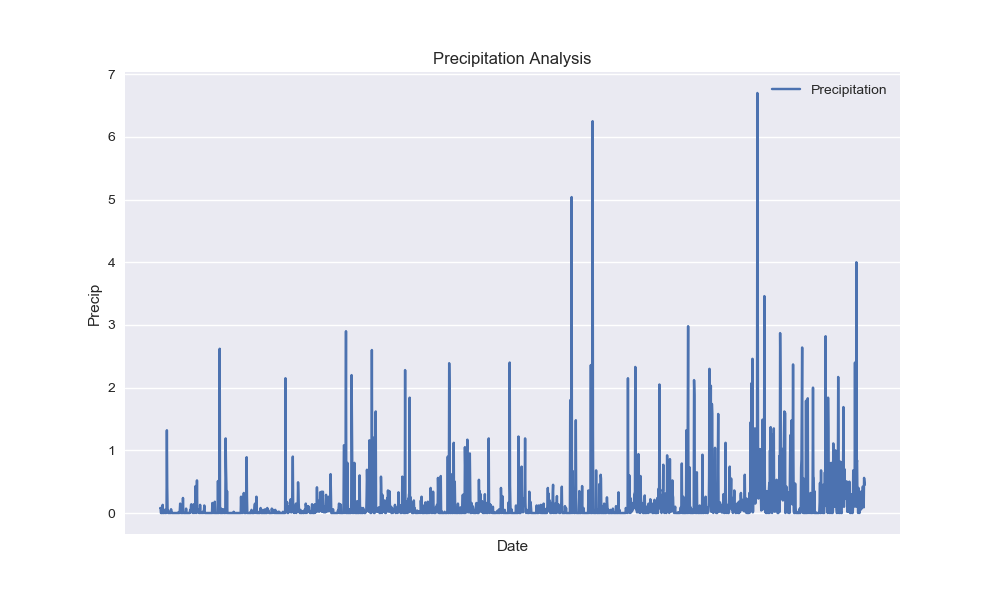

In [23]:
# plot the results using the `plot` method
#precip.plot(figsize=(10,6))
fig, ax = plt.subplots(figsize = (10,6))
precip.plot(ax=ax)
ax.xaxis.set_major_locator(mdates.MonthLocator('Date'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xlabel('Date')
plt.ylabel('Precip')
plt.title('Precipitation Analysis')
plt.show()

In [24]:
# print the summary stats
precip.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


Station Analysis

In [25]:
# query to calculate the total number of stations
station_totals = session.query(Station).filter(Station.station != '').count()
print('There are {} total stations'.format(station_totals))

There are 9 total stations


In [74]:
# query to find the most active station
active_station = session.query(func.count(Measurements.station), Measurements.station).group_by(Measurements.station).all()
active_station

[(1932, 'USC00511918'),
 (2696, 'USC00513117'),
 (1937, 'USC00514830'),
 (2484, 'USC00516128'),
 (683, 'USC00517948'),
 (342, 'USC00518838'),
 (2772, 'USC00519281'),
 (2685, 'USC00519397'),
 (2572, 'USC00519523')]

In [107]:
max_station = session.query(func.max(Measurements.station)).scalar()
print('The highest number of observations was from the {} station'.format(max_station))

The highest number of observations was from the USC00519523 station


In [109]:
# retrieve the last 12 months of tobs data
last_year = latest_date - dt.timedelta(days = 365)

In [116]:
# select only the `tobs` and `station` values
results_2 = session.query(Measurements.tobs, Measurements.station).filter(Measurements.date >= last_year).all()

In [117]:
# load the results into a pandas dataframe
tobs = pd.DataFrame(results_2, columns = ["Tobs", "Station"])

In [118]:
 # set the index to the `date` column
tobs.set_index("Tobs", inplace=True)

In [119]:
tobs.head()

,Station
Tobs,
79,USC00519397
80,USC00519397
79,USC00519397
77,USC00519397
78,USC00519397


In [132]:
# query to find the highest number of observations
high_station = session.query(func.count(Measurements.tobs), Measurements.tobs).group_by(Measurements.tobs).all()
high_station

[(1, 53),
 (1, 54),
 (1, 55),
 (12, 56),
 (18, 57),
 (29, 58),
 (19, 59),
 (47, 60),
 (74, 61),
 (128, 62),
 (177, 63),
 (233, 64),
 (343, 65),
 (426, 66),
 (560, 67),
 (694, 68),
 (1042, 69),
 (1179, 70),
 (1347, 71),
 (1482, 72),
 (1563, 73),
 (1627, 74),
 (1489, 75),
 (1502, 76),
 (1250, 77),
 (1044, 78),
 (697, 79),
 (532, 80),
 (329, 81),
 (142, 82),
 (68, 83),
 (32, 84),
 (9, 85),
 (3, 86),
 (3, 87)]

<IPython.core.display.Javascript object>


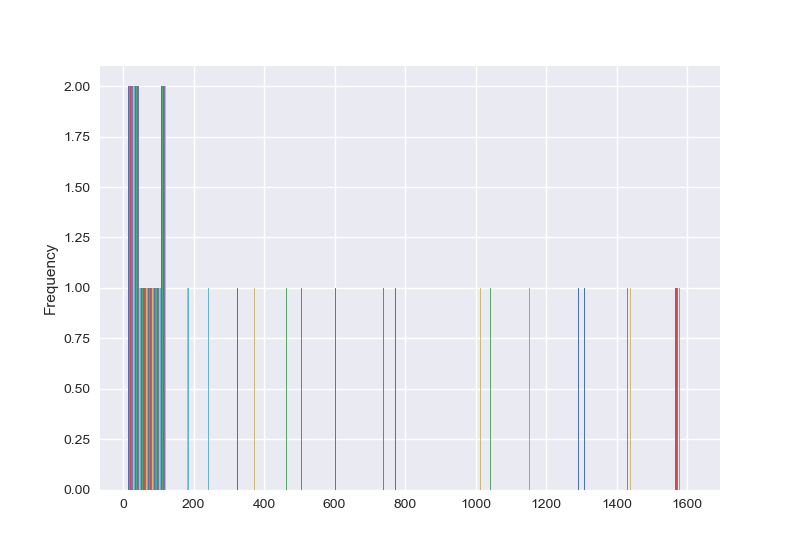

In [149]:
# plot the results as a histogram with bins=12
plt.hist(high_station, bins=12)
plt.ylabel('Frequency')
plt.show()